# Imports and Utils

In [20]:
import os
import sys

# Build an absolute path from this notebook's parent directory
sim_module_path = os.path.abspath(os.path.join('..', 'sim_measures'))
cl_module_path  = os.path.abspath(os.path.join('..', 'clustering'))
sys.path.append(sim_module_path)
sys.path.append(cl_module_path)

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d

from matplotlib.ticker import FormatStrFormatter

In [98]:
# Global Variables

# cm in inches
cm = 1/2.54

fig_width  =   8.45*cm
fig_height =   1.3*cm
plt.rcParams.update({'font.size': 5})

bar_width = 0.12

bar_colors = ['tab:blue', 'tab:orange', 'tab:cyan', 'tab:green', 'tab:red', 'tab:pink']
#                Frechet   Hausdorff       DTW          EDR          ERP       SSPD


# Runtime

In [68]:
def plot_runtimes(dataset, save_fig=False,show_legend=False,remove_ticks=False, ylim=1):

    fig,ax = plt.subplots(figsize=(fig_width,fig_height))
    
    scores = rt_df[ rt_df["dataset"] == dataset].iloc[0].to_list()
    scores = scores[2:]


    # sort scores by measure
    measure_scores = [[] for i in range(6)]
    for i,s in enumerate(scores):
        measure_scores[i % 6].append(s)

    # Group by method
    measures = ["dfr","hd","dtw","edr","erp","sspd"]
    methods = ["K-Medoids","DBSCAN","HDBSCAN","Aggl.","Spectral"]
    x = np.arange(len(methods))

    # 6 distance measures per method
    for i,m in enumerate(measure_scores):
        bars = ax.bar(x + i * (bar_width + 0.01),m,width=bar_width,color=bar_colors[i])

    # ax.set_xlabel("Method",fontweight='bold')
    ax.set_xticks(x + 3 * bar_width)
    ax.set_xticklabels(methods)
    ax.tick_params(width=0.5, length=2)

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    if remove_ticks:
        ax.set_yticklabels([])

    ax.set_ylim(0,ylim)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%5.2f'))
    for label in ax.get_yticklabels():
        label.set_fontname('Monospace')
        # label.set_fontsize(10)

    plt.ylabel("Runtime (s)")

    # Legend
    dfr_patch = mpatches.Patch(color='tab:blue', label='disc. Frechét')
    hd_patch = mpatches.Patch(color='tab:orange', label='Hausdorff')
    dtw_patch = mpatches.Patch(color='tab:cyan', label='DTW')
    edr_patch = mpatches.Patch(color='tab:green', label='EDR')
    erp_patch = mpatches.Patch(color='tab:red', label='ERP')
    sspd_patch = mpatches.Patch(color='tab:pink', label='SSPD')

    if show_legend:
        legend = ax.legend(handles=[dfr_patch,hd_patch,dtw_patch,edr_patch,erp_patch,sspd_patch],loc='lower center',bbox_to_anchor=(0, -2.15), ncols=3)
        fig1  = legend.figure
        fig1.canvas.draw()
        bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig("../data/score_data/half-width-legend.pdf", dpi="figure", bbox_inches=bbox)


    # Saving the Figure
    if save_fig:
        plt.savefig(f"../data/score_data/{dataset}_runtimes.pdf",bbox_inches='tight')

    plt.show()

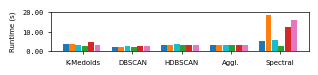

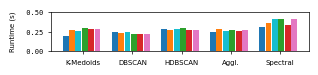

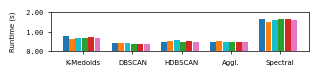

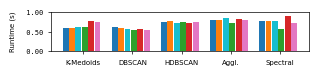

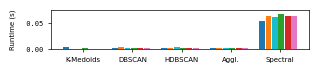

In [70]:
rt_df = pd.read_csv("../data/score_data/runtimes.csv",sep=";")
plot_runtimes("DigiLeTs",False,False,ylim=20)                         # Set first boolean to True to save the resulting figures
plot_runtimes("CROSS",False,False,ylim=0.5)                           # Set the second boolean to True to save the legend
plot_runtimes("ASL",False,False,ylim=2.0)
plot_runtimes("FishTrajectories",False,False,ylim=1.0)
plot_runtimes("Labomni",False,False,ylim=0.075)

# These plots look very pixalized in the Notebook but should be okay when saved as a pdf

# Score Data

In [90]:
formal = {"adj_rand" : "Adjusted Rand Score", "nmi" : "Normalized Mutual Info", "ami" : "Adjusted Mutual Info", "homogeneity" : "Homogeneity", "completeness" : "Completeness", "v-1" : "V-Measure", "v-2" : "V2-Measure", "v-0.5" : "V0.5-Measure", "fmi" : "Fowlkes Mallows Index"}

def plot_score(dataset,score,save_fig=False,show_legend=False,remove_ticks=False):

    fig,ax = plt.subplots(figsize=(fig_width,fig_height))

    data_scores = scores_df[scores_df["setup"].str.match(f"^({dataset}_)")]
    scores = data_scores[score].to_list()
    
    # sort scores by measure
    measure_scores = [[] for i in range(6)]
    for i,s in enumerate(scores):
        measure_scores[i % 6].append(s)

    # Group by method
    measures = ["dfr","hd","dtw","edr","erp","sspd"]
    methods = ["K-Medoids","DBSCAN","HDBSCAN","Aggl.","Spectral"]
    x = np.arange(len(methods))

    # 6 distance measures per method
    for i,m in enumerate(measure_scores):
        bars = ax.bar(x + i * (bar_width + 0.01),m,width=bar_width,color=bar_colors[i])

    # ax.set_xlabel("Method",fontweight='bold')
    ax.set_xticks(x + 3 * bar_width)
    ax.set_xticklabels(methods)
    ax.tick_params(width=0.5, length=2)

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    if remove_ticks:
        ax.set_yticklabels([])

    ax.set_ylim(0,1)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%5.2f'))
    for label in ax.get_yticklabels():
        label.set_fontname('Monospace')

    if remove_ticks:
        ax.set_yticklabels([])
    
    plt.title(f"{dataset} - {formal[score]}",fontweight='bold')
    
    # Legend
    dfr_patch = mpatches.Patch(color='tab:blue', label='disc. Frechét')
    hd_patch = mpatches.Patch(color='tab:orange', label='Hausdorff')
    dtw_patch = mpatches.Patch(color='tab:cyan', label='DTW')
    edr_patch = mpatches.Patch(color='tab:green', label='EDR')
    erp_patch = mpatches.Patch(color='tab:red', label='ERP')
    sspd_patch = mpatches.Patch(color='tab:pink', label='SSPD')

    if show_legend:
        legend = ax.legend(handles=[dfr_patch,hd_patch,dtw_patch,edr_patch,erp_patch,sspd_patch],loc='lower center',bbox_to_anchor=(0, -2.15), ncols=3)
        fig1  = legend.figure
        fig1.canvas.draw()
        bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig("../data/score_data/half-width-legend.pdf", dpi="figure", bbox_inches=bbox)


    # Saving the Figure
    if save_fig:
        plt.savefig(f"../data/score_data/{dataset}_{score}.pdf",bbox_inches='tight')

    plt.show()

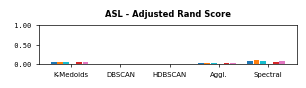

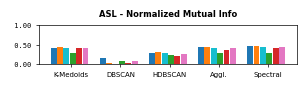

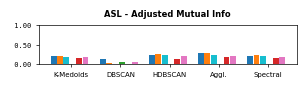

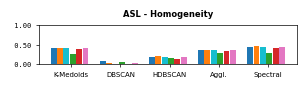

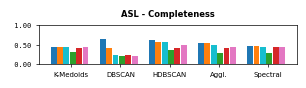

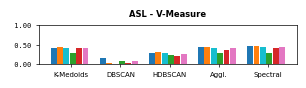

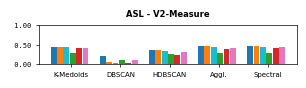

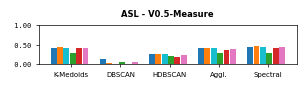

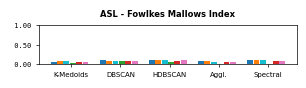

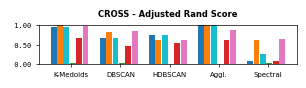

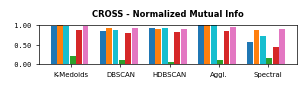

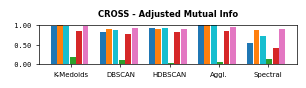

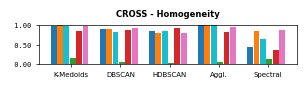

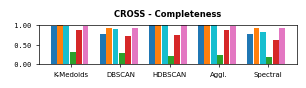

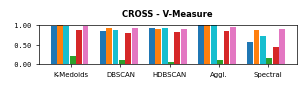

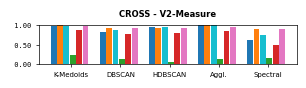

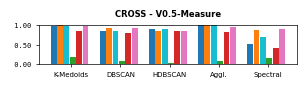

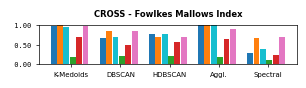

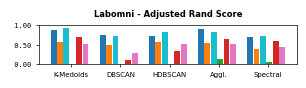

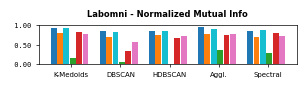

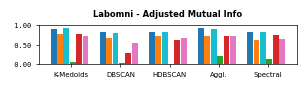

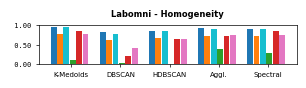

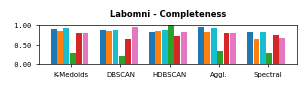

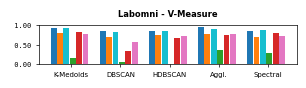

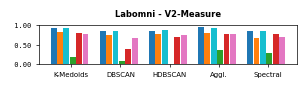

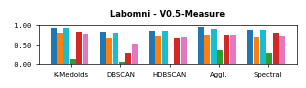

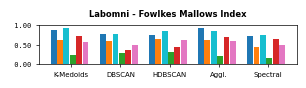

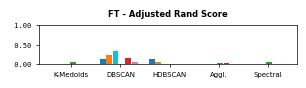

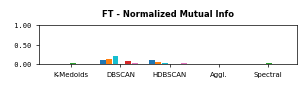

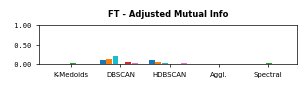

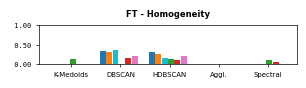

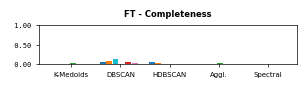

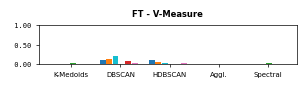

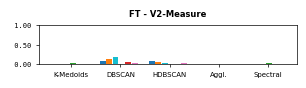

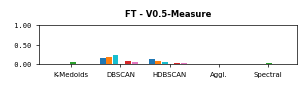

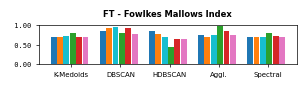

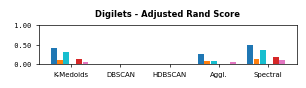

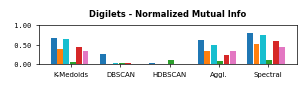

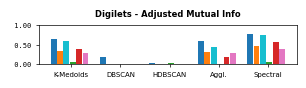

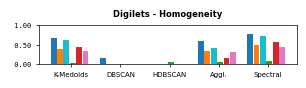

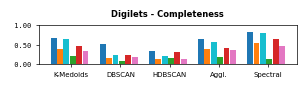

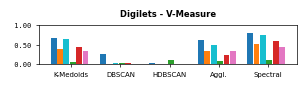

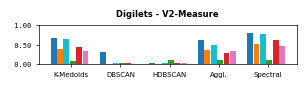

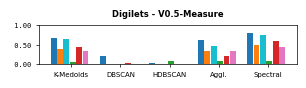

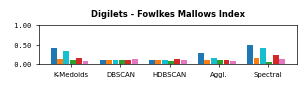

In [94]:
scores_df = pd.read_csv("../data/score_data/gt_scores.csv",sep=";")
for dataset in ["ASL","CROSS","Labomni","FT","Digilets"]:
    for score in formal.keys():
        plot_score(dataset,score,False,False,False)

# Correlation Results

In [135]:
fig_width = 10*cm

def plot_correlation(dataset, save_fig=False,show_legend=False,remove_ticks=False):

    fig,ax = plt.subplots(figsize=(fig_width,fig_height))
    
    scores = cr_df[ cr_df["dataset"] == dataset].iloc[0].to_list()
    scores = scores[2:]

    # sort scores by measure
    measure_scores = [[] for i in range(6)]
    for i,s in enumerate(scores):
        measure_scores[i % 6].append(s)

    # Group by method
    measures = ["dfr","hd","dtw","edr","erp","sspd"]
    methods = ["K-Medoids","DBSCAN","HDBSCAN","Aggl.","Spectral","GT"]
    x = np.arange(len(methods))

    # 6 distance measures per method
    for i,m in enumerate(measure_scores):
        bars = ax.bar(x + i * (bar_width + 0.01),m,width=bar_width,color=bar_colors[i])

    # ax.set_xlabel("Method",fontweight='bold')
    ax.set_xticks(x + 3 * bar_width)
    ax.set_xticklabels(methods)
    ax.tick_params(width=0.5, length=2)

    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    if remove_ticks:
        ax.set_yticklabels([])

    ax.set_ylim(-0.6,1.1)
    ax.set_yticks([-0.5,0,0.5,1])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%5.2f'))
    for label in ax.get_yticklabels():
        label.set_fontname('Monospace')
        # label.set_fontsize(10)

    plt.ylabel("Correlation")
    plt.axhline(y=0,linewidth=0.5, color='k')

    # Legend
    dfr_patch = mpatches.Patch(color='tab:blue', label='disc. Frechét')
    hd_patch = mpatches.Patch(color='tab:orange', label='Hausdorff')
    dtw_patch = mpatches.Patch(color='tab:cyan', label='DTW')
    edr_patch = mpatches.Patch(color='tab:green', label='EDR')
    erp_patch = mpatches.Patch(color='tab:red', label='ERP')
    sspd_patch = mpatches.Patch(color='tab:pink', label='SSPD')

    if show_legend:
        legend = ax.legend(handles=[dfr_patch,hd_patch,dtw_patch,edr_patch,erp_patch,sspd_patch],loc='lower center',bbox_to_anchor=(0, -2.15), ncols=3)
        fig1  = legend.figure
        fig1.canvas.draw()
        bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig("../data/score_data/half-width-legend.pdf", dpi="figure", bbox_inches=bbox)


    # Saving the Figure
    if save_fig:
        plt.savefig(f"../data/score_data/{dataset}_correlation.pdf",bbox_inches='tight')

    plt.show()

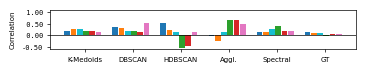

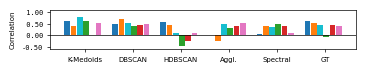

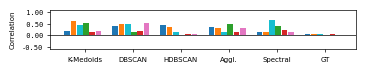

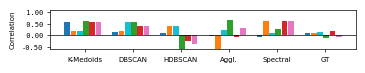

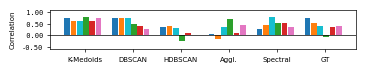

In [137]:
cr_df = pd.read_csv("../data/score_data/correlation.csv",sep=";")
plot_correlation("Digilets",False,False,)                         # Set first boolean to True to save the resulting figures
plot_correlation("CROSS",False,False)                             # Set the second boolean to True to save the legend
plot_correlation("ASL",False,False)
plot_correlation("FT",False,False)
plot_correlation("Labomni",False,False)